In [1]:
import cv2
import os
import shutil
import itertools

In [2]:
from skimage.io import imread_collection
import glob
#your path 
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [3]:
import os
for i in range(0, len(yes_dir)):
    os.rename(yes_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/yes\\yes_' + str(i+1) + '.jpg')
for i in range(0, len(no_dir)):
    os.rename(no_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/no\\no_' + str(i+1) + '.jpg')

In [4]:
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [5]:
import os

# define the name of the directory to be created
path = ["C:/git/obrazyMRI/data/TEST/YES","C:/git/obrazyMRI/data/TEST/NO", "C:/git/obrazyMRI/data/TRAIN/YES",
       "C:/git/obrazyMRI/data/TRAIN/NO", "C:/git/obrazyMRI/data/VAL/YES", "C:/git/obrazyMRI/data/VAL/NO"]
for i in path:
    try:
        os.makedirs(i)
    except OSError:
        print ("Creation of the directory %s failed" % i)
    else:
        print ("Successfully created the directory %s" % i)

Successfully created the directory C:/git/obrazyMRI/data/TEST/YES
Successfully created the directory C:/git/obrazyMRI/data/TEST/NO
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/YES
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/NO
Successfully created the directory C:/git/obrazyMRI/data/VAL/YES
Successfully created the directory C:/git/obrazyMRI/data/VAL/NO


In [6]:
from math import *
import numpy as np
yes_test=np.random.choice(yes_dir, size=5, replace=False)
for i in yes_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/YES" )
yes_dir=list(set(yes_dir)-set(yes_test))
yes_train=np.random.choice(yes_dir, size=floor(0.8*len(yes_dir)), replace=False)
for i in yes_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/YES" )
yes_val=list(set(yes_dir)-set(yes_train))
for i in yes_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/YES" )

In [7]:
from math import *
no_test=np.random.choice(no_dir, size=5, replace=False)
for i in no_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/NO" )
no_dir=list(set(no_dir)-set(no_test))
no_train=np.random.choice(no_dir, size=floor(0.8*len(no_dir)), replace=False)
for i in no_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/NO" )
no_val=list(set(no_dir)-set(no_train))
for i in no_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/NO" )

In [8]:
import numpy as np
from random import shuffle
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

yes_train=list(yes_train)
no_train=list(no_train)
yes_val=list(yes_val)
no_val=list(no_val)
yes_test=list(yes_test)
no_test=list(no_test)

train_files = yes_train + no_train
val_files = yes_val + no_val
test_files = yes_test + no_test

shuffle(train_files)

IMG_DIM = (64, 64)
x_train = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in train_files])
x_val = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in val_files])
x_test = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in test_files])

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

x_train.astype('float64')
x_train /= 255.0
x_val.astype('float64')
x_val /= 255.0
x_test.astype('float64')
x_test /= 255.0

train_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in train_files]
val_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in val_files]
test_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in test_files]

le = LabelEncoder()
le.fit(train_labels)

y_train = le.transform(train_labels)
y_val = le.transform(val_labels)
y_test = le.transform(test_labels)


Using TensorFlow backend.


In [9]:
y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

batch_size = 128
num_classes = 2
epochs = 150
input_shape = (64, 64, 3)

model = Sequential(name='basic cnn with dropout model')

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.45))

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=36,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        20752     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
__________________________________________________________

In [11]:
history = model.fit(x=x_train, y=y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)




Train on 194 samples, validate on 49 samples
Epoch 1/150





194/194 [==============================] - 3s 15ms/step - loss: 1.4309 - acc: 0.4845 - val_loss: 0.6920 - val_acc: 0.6122
Epoch 2/150
194/194 [==============================] - 2s 11ms/step - loss: 0.6885 - acc: 0.6134 - val_loss: 0.6848 - val_acc: 0.6122
Epoch 3/150
194/194 [==============================] - 2s 11ms/step - loss: 0.6686 - acc: 0.6186 - val_loss: 0.6570 - val_acc: 0.6122
Epoch 4/150
194/194 [==============================] - 2s 11ms/step - loss: 0.6501 - acc: 0.6186 - val_loss: 0.6618 - val_acc: 0.6122
Epoch 5/150
194/194 [==============================] - 2s 12ms/step - loss: 0.6558 - acc: 0.6186 - val_loss: 0.6888 - val_acc: 0.6122
Epoch 6/150
194/194 [==============================] - 2s 12ms/step - loss: 0.6780 - acc: 0.6289 - val_loss: 0.6685 - val_acc: 0.6122
Epoch 7/150
194/194 [==============================] - 2s 12ms/step - loss: 0.7161 - acc: 0.6186 - val_loss: 0.6941 - val_acc: 0.3878
Epoch 8/1

Epoch 49/150
194/194 [==============================] - 2s 12ms/step - loss: 0.3764 - acc: 0.8144 - val_loss: 0.4056 - val_acc: 0.8367
Epoch 50/150
194/194 [==============================] - 2s 12ms/step - loss: 0.2909 - acc: 0.8557 - val_loss: 0.4538 - val_acc: 0.8571
Epoch 51/150
194/194 [==============================] - 2s 12ms/step - loss: 0.2810 - acc: 0.8711 - val_loss: 0.6034 - val_acc: 0.8367
Epoch 52/150
194/194 [==============================] - 2s 13ms/step - loss: 0.2990 - acc: 0.8557 - val_loss: 0.4826 - val_acc: 0.8367
Epoch 53/150
194/194 [==============================] - 3s 13ms/step - loss: 0.2334 - acc: 0.8814 - val_loss: 0.5568 - val_acc: 0.6531
Epoch 54/150
194/194 [==============================] - 2s 12ms/step - loss: 0.5289 - acc: 0.7474 - val_loss: 0.4407 - val_acc: 0.8571
Epoch 55/150
194/194 [==============================] - 3s 14ms/step - loss: 0.2982 - acc: 0.8814 - val_loss: 0.4305 - val_acc: 0.8571
Epoch 56/150
194/194 [==============================] -

194/194 [==============================] - 2s 13ms/step - loss: 0.0136 - acc: 0.9948 - val_loss: 1.3273 - val_acc: 0.8571
Epoch 110/150
194/194 [==============================] - 2s 13ms/step - loss: 0.0301 - acc: 0.9845 - val_loss: 1.1012 - val_acc: 0.8776
Epoch 111/150
194/194 [==============================] - 2s 13ms/step - loss: 0.0137 - acc: 0.9948 - val_loss: 0.9679 - val_acc: 0.8776
Epoch 112/150
194/194 [==============================] - 2s 12ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.1370 - val_acc: 0.8776
Epoch 113/150
194/194 [==============================] - 3s 14ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.1039 - val_acc: 0.8776
Epoch 114/150
194/194 [==============================] - 2s 13ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.1287 - val_acc: 0.8776
Epoch 115/150
194/194 [==============================] - 2s 13ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.3765 - val_acc: 0.8776
Epoch 116/150
194/194 [==============================] - 2s 13

In [12]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.800000011920929


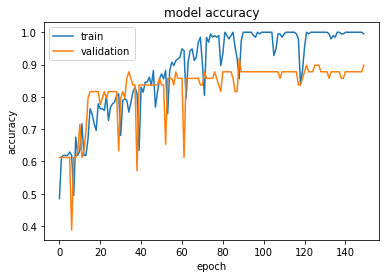

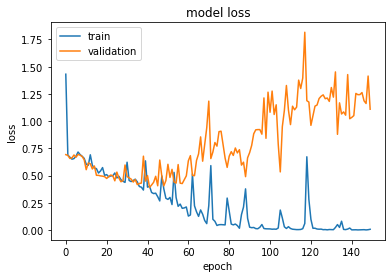

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()